In [1]:
import matplotlib.pyplot as plt
import numpy as np

from maze_dataset import MazeDataset, MazeDatasetConfig, SolvedMaze
from maze_dataset.generation import LatticeMazeGenerators


def bool_array_to_latex(arr: np.ndarray) -> str:
	"""Convert boolean numpy array to LaTeX matrix string with 0,1 values"""
	int_arr = arr.astype(int)
	rows = []
	for row in int_arr:
		row_str = " & ".join(map(str, row))
		rows.append(row_str)

	matrix_content = " \\\\\n".join(rows)
	return f"\\begin{{bmatrix}}\n{matrix_content}\n\\end{{bmatrix}}"

In [2]:
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="test",
	grid_n=3,
	n_mazes=4,
	maze_ctor=LatticeMazeGenerators.gen_dfs,
)

dataset: MazeDataset = MazeDataset.from_config(cfg, save_local=False, load_local=False)
maze: SolvedMaze = dataset.mazes[1]

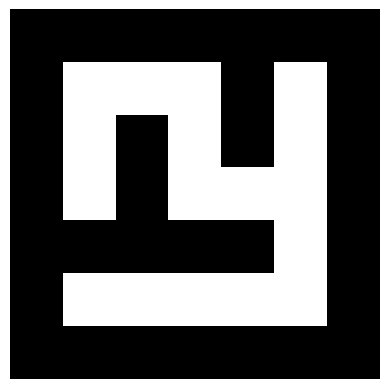

In [3]:
plt.imshow(maze.as_pixels(show_endpoints=False, show_solution=False))
plt.axis("off")
plt.savefig("maze-impl.pdf", bbox_inches="tight", pad_inches=0.01)

In [4]:
print(bool_array_to_latex(maze.connection_list[0]))
print(bool_array_to_latex(maze.connection_list[1]))

\begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 1 \\
0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 1 & 0
\end{bmatrix}
